<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/Clustering_market_campaigning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df= pd.read_csv("/content/marketing_campaign.csv")

In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [12]:
df["Income"]=df["Income"].fillna(df["Income"].mean())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [14]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [15]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [16]:
sns.set_style("whitegrid")

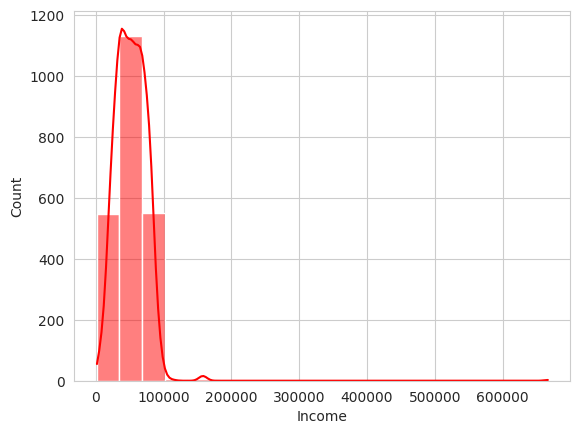

In [18]:
sns.histplot(df["Income"], bins=20,kde=True, color="red")
plt.show()

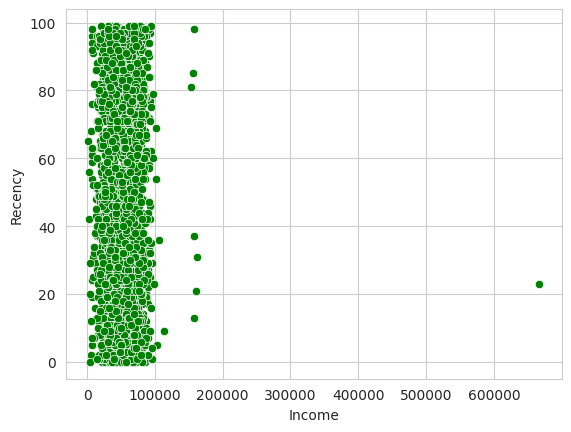

In [19]:
sns.scatterplot(data=df, x="Income", y="Recency", color="green")
plt.show()

In [20]:
from datetime import datetime

In [22]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"], dayfirst=True)

In [24]:
df.describe(include=object)

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Marital_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Marital_Status'].value_counts()
    for x_label, grp in _df_2.groupby('Education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Education')
_ = plt.ylabel('Marital_Status')

In [25]:
df['Age']=2025-df["Year_Birth"]

In [27]:
df["Children"]=df["Kidhome"]+df["Teenhome"]

df['Customer_Since'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

In [28]:
df["Education"].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [29]:
df["Marital_Status"].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [30]:
df["Education"]=df["Education"].replace({'Graduation':'Graduate',
                                         'Master':'Postgraduate',
                                         'PhD':'Postgraduate',
                                         '2n Cycle':'Postgraduate',
                                         'Basic':'Undergraduate'})

In [31]:
df['Education'].value_counts()

,count
Education,
Graduate,1127
Postgraduate,1059
Undergraduate,54


In [32]:
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Partner",
                                                   "Together":"Partner",
                                                   "Single":"Single",
                                                   "Divorced":"Single",
                                                   "Widow":"Single",
                                                   "Alone":"Single",
                                                   "YOLO":"Single",
                                                   "Absurd":"Single"})

In [33]:
df["Marital_Status"].value_counts()

,count
Marital_Status,
Partner,1444
Single,796


In [34]:
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status'].apply(lambda x: 2 if x == 'Partnered' else 1)

In [35]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['TotalAcceptedCmp'] = df[campaigns].sum(axis=1)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [36]:
drop_cols = [
    'Year_Birth', 'Dt_Customer','Kidhome', 'Teenhome',  'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5',
    'Z_CostContact'	,'Z_Revenue'
]
df.drop(columns=drop_cols, inplace=True)

In [37]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumDealsPurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Children', 'Customer_Since', 'Family_Size', 'TotalAcceptedCmp',
       'Monetary', 'Frequency'],
      dtype='object')

In [38]:
df_vis = df.copy()
columns=["Income","Age"]
outlier_summary={}
for col in columns:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  IQR= q3-q1
  lower_bound= q1-1.5*IQR
  upper_bound= q3+1.5*IQR
  outliers=df_vis[(df_vis[col]<lower_bound)| (df_vis[col]>upper_bound)]

In [39]:
len(outliers)

3

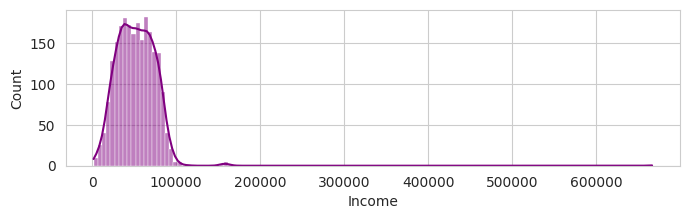

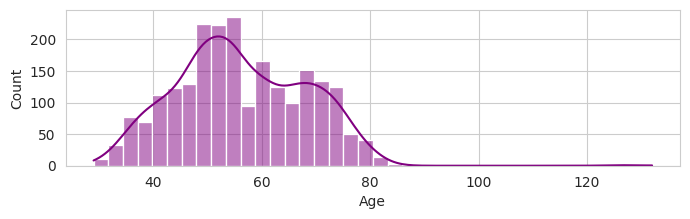

In [45]:
columns=["Income","Age"]
for i, col in enumerate(columns):
  plt.figure(figsize=(7,4))
  plt.subplot(2,1,i+1)
  sns.histplot(df[col], kde=True, color="purple")
  plt.tight_layout()
  plt.show()


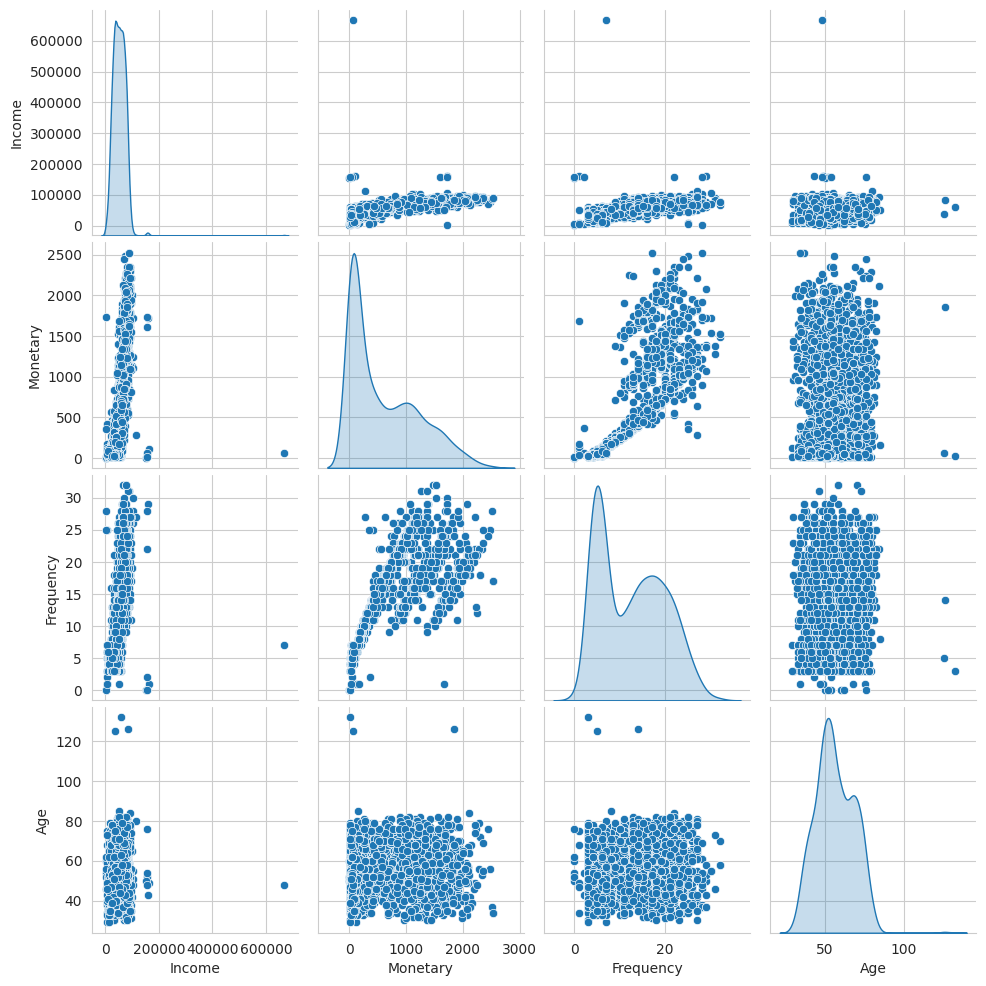

In [49]:
sns.pairplot(df, vars=['Income', 'Monetary', 'Frequency', 'Age'],diag_kind='kde')
plt.show()

In [50]:
status_monetary= df.groupby("Marital_Status")["Monetary"].mean()

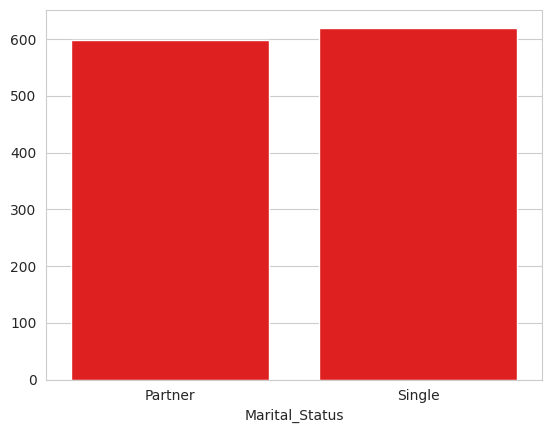

In [51]:
sns.barplot(x=status_monetary.index, y=status_monetary.values, color="red")
plt.show()

In [52]:
rfm= df[["ID",'Recency','Frequency','Monetary']].copy()
rfm.set_index('ID', inplace=True)
rfm.head()

,Recency,Frequency,Monetary
ID,,,
5524,58,22,1617
2174,38,4,27
4141,26,20,776
6182,26,6,53
5324,94,14,422


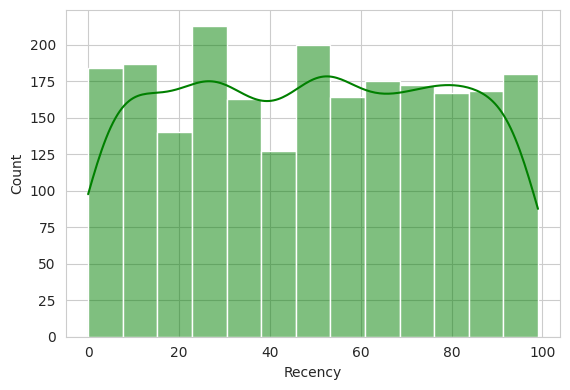

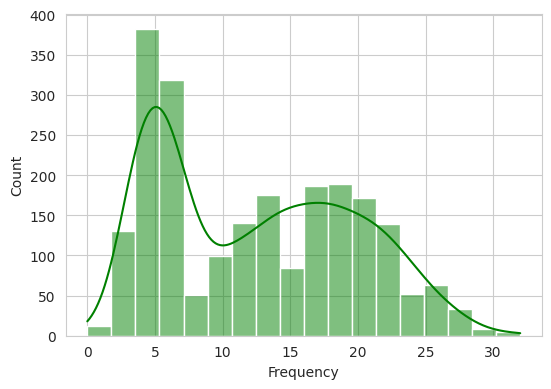

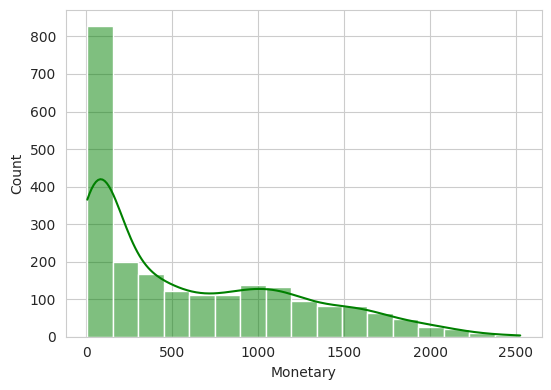

In [53]:
for i, col in enumerate(rfm.columns):
  plt.figure(figsize=(16,4))
  plt.subplot(1,3,i+1)
  sns.histplot(rfm[col], kde=True, color="green")
  plt.tight_layout()
  plt.show()

In [54]:
rfm_log = rfm.copy()
rfm_log['Recency'] = np.log1p(rfm_log['Recency'])
rfm_log['Frequency'] = np.log1p(rfm_log['Frequency'])
rfm_log['Monetary'] = np.log1p(rfm_log['Monetary'])

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index = rfm.index , columns=rfm.columns)

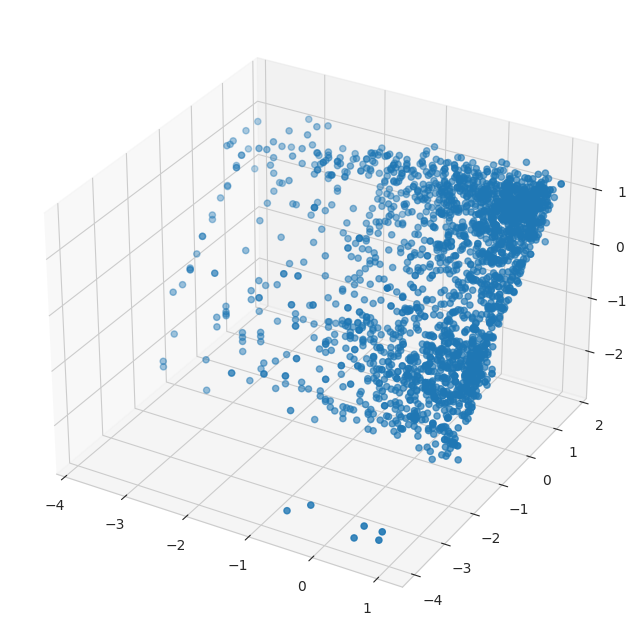

In [60]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter=ax.scatter(rfm_scaled_df['Recency'],rfm_scaled_df['Frequency'],rfm_scaled_df['Monetary'])
plt.show()

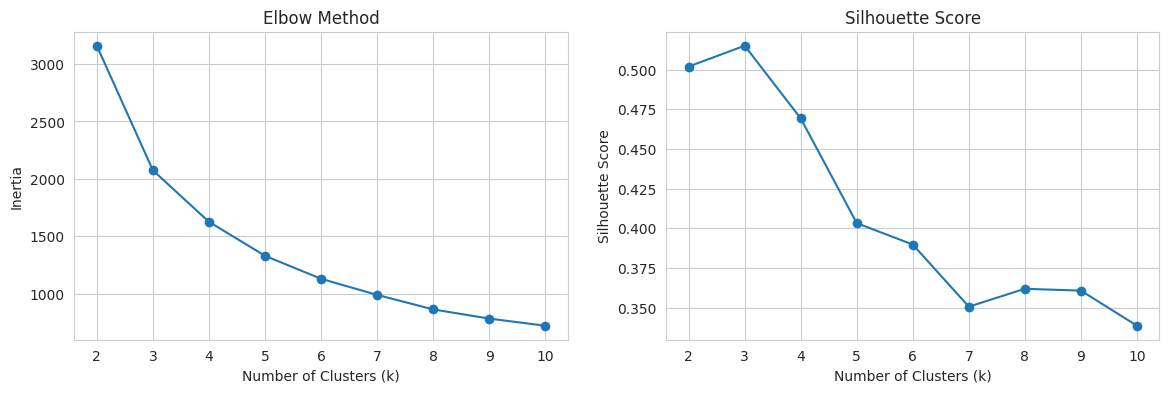

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia=[]
silhouette_scores=[]
k_values= range(2,11)
for k in k_values:
  kmeans= KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for KMeans
  cluster_labels= kmeans.fit_predict(rfm_scaled_df)
  sil_score=silhouette_score(rfm_scaled_df, cluster_labels) # Corrected typo
  silhouette_scores.append(sil_score)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [68]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(rfm_scaled_df)
cluster_labels

array([1, 0, 1, ..., 1, 2, 0], dtype=int32)

In [69]:
rfm['Cluster'] = cluster_labels

In [70]:
df.set_index('ID', inplace=True)
df = df.join(rfm['Cluster'], how='inner')

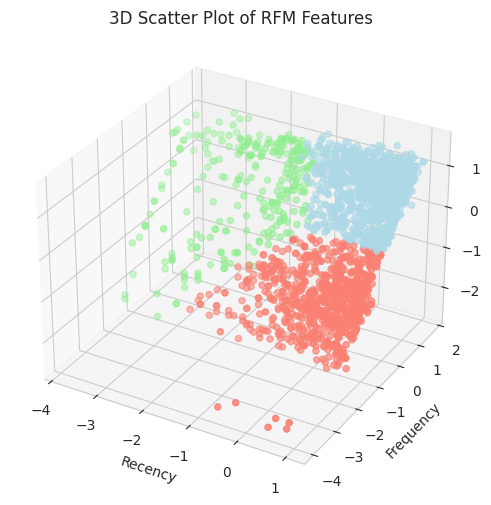

In [71]:
cluster_colors = {0: 'salmon', 1: 'lightblue', 2: 'lightgreen'}

colors = df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rfm_scaled_df['Recency'], rfm_scaled_df['Frequency'], rfm_scaled_df['Monetary'],c=colors,marker='o')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title('3D Scatter Plot of RFM Features')
plt.show()


In [72]:
rfm_summary = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
rfm_summary['NumCustomers'] = df['Cluster'].value_counts().sort_index()
rfm_summary = rfm_summary.reset_index()
print(rfm_summary)

   Cluster  Recency  Frequency  Monetary  NumCustomers
0        0    53.03       5.19     72.74           858
1        1    56.94      17.84   1000.47          1104
2        2     5.94      14.14    683.64           278
